<a href="https://colab.research.google.com/github/daosonn/Ex2_sun_scholarship/blob/main/SUN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import matplotlib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
import os
from matplotlib import pyplot as plt
!%mathplotlib inline
filename = 'Dataset.csv'
with open(filename, 'r') as f:
  data = f.read()

print(data)

/bin/bash: line 1: fg: no job control
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1
4,110,92,0,0,37.6,0.191,30,0
10,168,74,0,0,38,0.537,34,1
10,139,80,0,0,27.1,1.441,57,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
7,100,0,0,0,30,0.484,32,1
0,118,84,47,230,45.8,0.551,31,1
7,107,74,0,0,29.6,0.254,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0
7,196,90,0,0,39.8,0.451,41,1
9,119,80,35,0,29,0.263,29,1
11,143,94,33,146,36.6,0.254,51,1
10,125,70,26,115,31.1,0.205,41,1
7,147,76,0,0,39.4,0.257,43,1
1,97,66,15,140,23.2,0.487,22,0
13,145,82,19,110,22.2,0.245,

In [90]:
data = pd.read_csv('Dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
df = pd.read_csv("Dataset.csv")
df1 = df.drop(columns = 'Outcome')
target = df['Outcome']
train_data = df.iloc[1:595]
test_data = df.iloc[595:]
X_train=train_data.iloc[:,:8]
y_train=train_data.iloc[:,8]
X_test=test_data.iloc[:,:8]
y_test=test_data.iloc[:,8]
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (594, 8)
y_train shape: (594,)
X_test shape: (173, 8)
y_test shape: (173,)


In [92]:
df1.shape

(768, 8)

In [93]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [94]:
df1.isnull().sum()
print(df1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [95]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [96]:
df1[df1['Pregnancies'].apply(is_float)].head(800)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [97]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaled_df1 = scaler.fit_transform(df1)
print(scaled_df1)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [98]:
from sklearn.preprocessing import StandardScaler



scale_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

scale = StandardScaler()

X_train = scale.fit_transform(X_train[scale_list])
X_test = scale.transform(X_test[scale_list])

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                288       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                      

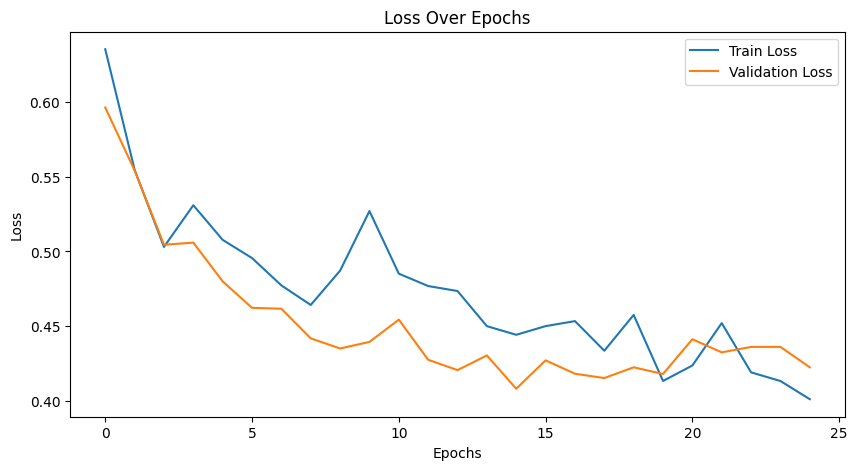

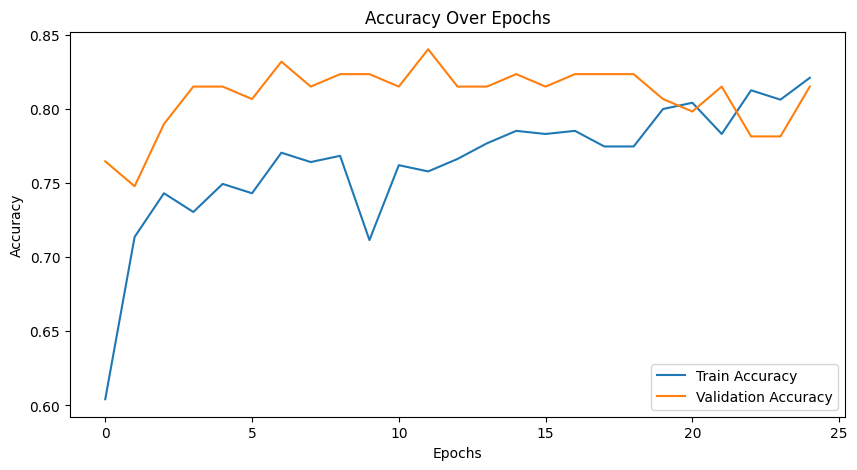

In [112]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping



def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.01






model = Sequential()

model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))



model.add(Dense(1, activation='sigmoid'))


model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)






checkpoint = ModelCheckpoint('model_weights.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max'
                            )
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1, batch_size=32, callbacks=[checkpoint, early_stopping])



train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [113]:
model.load_weights('model_weights.h5')

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

6/6 [==============================] - 0s 4ms/step - loss: 0.4613 - accuracy: 0.8150
Loss: 0.46125638484954834
Accuracy: 0.8150289058685303


In [102]:
!pip install keras-tuner
import keras_tuner as kt


In [103]:
def build_model(hp):

    model = Sequential()

    model.add(Dense(32, activation='relu', input_dim=8))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))



    model.add(Dense(1, activation='sigmoid'))





    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [104]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

for trial in tuner.oracle.get_best_trials(num_trials=5):
    print("my_dir1:", trial.trial_id)
    print("Optimizer:", trial.hyperparameters.values['optimizer'])
    print("Hyperparameters:", trial.hyperparameters.values)
    print(accuracy)
    print()

Reloading Tuner from ./untitled_project/tuner0.json
my_dir1: 3
Optimizer: rmsprop
Hyperparameters: {'optimizer': 'rmsprop'}
0.763005793094635

my_dir1: 1
Optimizer: adam
Hyperparameters: {'optimizer': 'adam'}
0.763005793094635

my_dir1: 0
Optimizer: sgd
Hyperparameters: {'optimizer': 'sgd'}
0.763005793094635

my_dir1: 2
Optimizer: adadelta
Hyperparameters: {'optimizer': 'adadelta'}
0.763005793094635



In [105]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [106]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                        

In [107]:

def build_model(hp):
    model = Sequential()

    num_layers = hp.Int('num_layers', min_value=1, max_value=5, step=1)

    for i in range(num_layers):
        units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)

        activation = hp.Choice(f'activation_{i}', values=['relu', 'sigmoid', 'tanh'])

        if i == 0:
            model.add(Dense(units, activation=activation, input_shape=(8,)))
        else:
            model.add(Dense(units, activation=activation))

    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




    checkpoint_callback = ModelCheckpoint(filepath='weight_final',
                                          monitor='val_accuracy',
                                          mode='max',
                                          save_best_only=True)


    return model

In [108]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=25,
    executions_per_trial=1,
    directory='chay test toi uu',
    project_name='my_project1'
)
tuner.search_space_summary()

Reloading Tuner from chay test toi uu/my_project1/tuner0.json
Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop', 'adadelta'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation_2 (Choice)
{'default': 'relu', 'conditions

In [109]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test),
              callbacks=[checkpoint])

In [110]:
tuner.results_summary()

Results summary
Results in chay test toi uu/my_project1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 14 summary
Hyperparameters:
num_layers: 3
units_0: 480
activation_0: relu
optimizer: adam
units_1: 352
activation_1: sigmoid
units_2: 128
activation_2: sigmoid
units_3: 192
activation_3: sigmoid
units_4: 320
activation_4: tanh
Score: 0.8208092451095581

Trial 13 summary
Hyperparameters:
num_layers: 4
units_0: 384
activation_0: relu
optimizer: rmsprop
units_1: 320
activation_1: relu
units_2: 256
activation_2: tanh
units_3: 96
activation_3: relu
units_4: 224
activation_4: relu
Score: 0.8208092451095581

Trial 22 summary
Hyperparameters:
num_layers: 5
units_0: 32
activation_0: tanh
optimizer: adam
units_1: 64
activation_1: tanh
units_2: 224
activation_2: relu
units_3: 256
activation_3: sigmoid
units_4: 288
activation_4: tanh
Score: 0.8208092451095581

Trial 08 summary
Hyperparameters:
num_layers: 1
units_0: 32
activation_0: tanh
optimizer: sgd
units_1: 352


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 192)               1728      
                                                                 
 dropout_1 (Dropout)         (None, 192)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 192)               768       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 128)               24704     
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 96)                3168      
                                                      

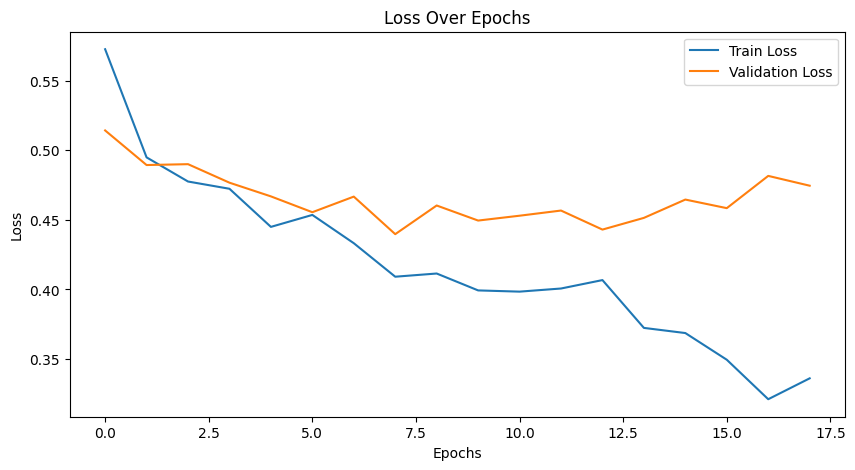

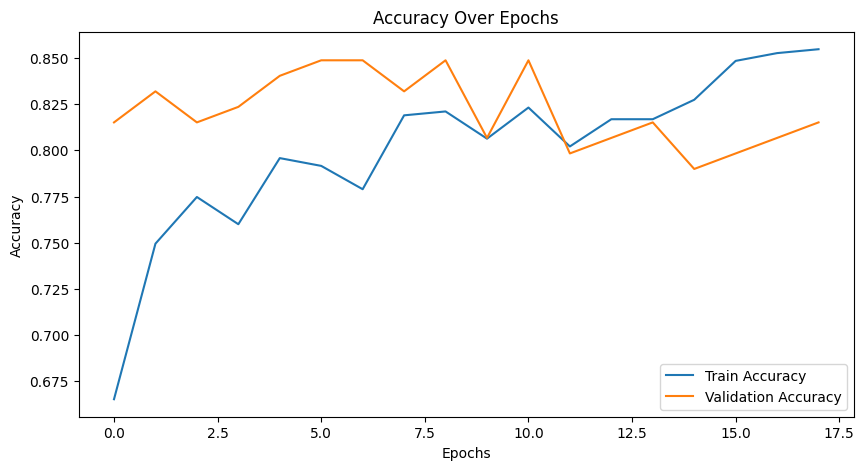

In [111]:
from keras.optimizers import RMSprop


def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.01






model = Sequential()

model.add(Dense(192, activation='relu', input_dim=8))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(96, activation='tanh'))



model.add(Dense(1, activation='sigmoid'))


model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)





# Khởi tạo một ModelCheckpoint callback
checkpoint = ModelCheckpoint('model_weights.h5',
                             monitor='val_accuracy',  # Điều kiện để lưu trọng số
                             verbose=1,
                             save_best_only=True,  # Lưu trọng số tốt nhất
                             mode='max'  # Chế độ tối ưu
                            )
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1, batch_size=32, callbacks=[checkpoint, early_stopping])


# Lấy thông tin về mất mát và độ chính xác từ lịch sử huấn luyện
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Vẽ đồ thị loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
model.load_weights('model_weights.h5')

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

6/6 [==============================] - 0s 9ms/step - loss: 0.5004 - accuracy: 0.8035
Loss: 0.5003832578659058
Accuracy: 0.8034682273864746
